In [41]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# load the dataset
chat_gpt = pd.read_csv("chatgpt_reviews.csv")

chat_gpt.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [7]:
chat_gpt.isnull().sum()

Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

We will switch the null values for blanks 

In [9]:
chat_gpt['Review'] = chat_gpt['Review'].astype(str).fillna('')

In [14]:
chat_gpt['Review Date'] = pd.to_datetime(chat_gpt['Review Date'])

In [18]:
# Removing duplicates
chat_gpt_clean = chat_gpt.drop_duplicates(subset=['Review'])

# Text cleaning: Removing punctuation, converting to lower case
import re

chat_gpt_clean['Cleaned Review'] = chat_gpt_clean['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))


/tmp/ipykernel_292/2490992600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_gpt_clean['Cleaned Review'] = chat_gpt_clean['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))


In [20]:
# Rating distribution
rating_dist = chat_gpt_clean['Ratings'].value_counts()
print(rating_dist)

# Review length analysis
chat_gpt_clean['Review Length'] = chat_gpt_clean['Review'].apply(len)
print(chat_gpt_clean[['Review', 'Review Length']])


Ratings
5    91205
4    15349
1    10243
3     5930
2     2769
Name: count, dtype: int64
                                                   Review  Review Length
0                                                    good              4
2                                                nice app              8
3                                                nice, ig              8
4       this is a great app, the bot is so accurate to...            368
5                                             so nice app             11
...                                                   ...            ...
196722                                        Update 2023             11
196723                                          its grear              9
196724                                      Funtastic App             13
196725                                             hi all              6
196726                                 expert application             18

[125496 rows x 2 columns]


/tmp/ipykernel_292/2228935572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_gpt_clean['Review Length'] = chat_gpt_clean['Review'].apply(len)


In [26]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 10.6 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
from textblob import TextBlob

# Sentiment analysis
chat_gpt_clean['Sentiment'] = chat_gpt_clean['Cleaned Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(chat_gpt_clean[['Cleaned Review', 'Sentiment']])

# Correlation with ratings
correlation = chat_gpt_clean['Ratings'].corr(chat_gpt_clean['Sentiment'])
print(f'Correlation between ratings and sentiment: {correlation}')


                                           Cleaned Review  Sentiment
0                                                    good        0.7
2                                                nice app        0.6
3                                                 nice ig        0.6
4       this is a great app the bot is so accurate to ...        0.4
5                                             so nice app        0.6
...                                                   ...        ...
196722                                        update 2023        0.0
196723                                          its grear        0.0
196724                                      funtastic app        0.0
196725                                             hi all        0.0
196726                                 expert application        0.0

[125496 rows x 2 columns]
Correlation between ratings and sentiment: 0.3680682416971761


/tmp/ipykernel_292/1793924646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_gpt_clean['Sentiment'] = chat_gpt_clean['Cleaned Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [32]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 8.5 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


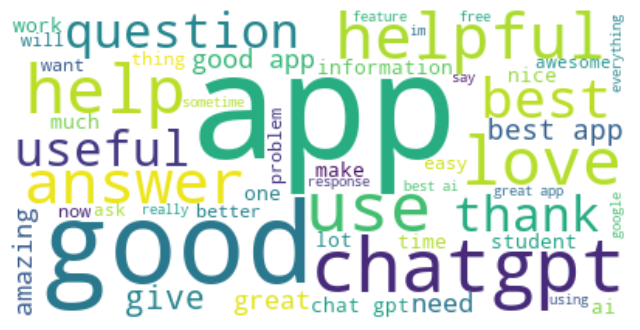

In [43]:
from wordcloud import WordCloud

# Generating word cloud
text = " ".join(review for review in chat_gpt_clean['Cleaned Review'])
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Word frequency analysis
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(chat_gpt_clean['Cleaned Review'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the word frequencies
word_freq_sum = word_freq.sum().sort_values(ascending=False)
print(word_freq_sum.head(10))


app        39859
good       19012
best       12655
ai         10787
chatgpt     9949
like        8485
helpful     8466
great       7928
use         7115
love        6804
dtype: int64
